# Annual Returns & Monthly Returns

In [1]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2007-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Data
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,20.080000,20.400000,19.350000,19.520000,19.520000,28350300
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200


In [3]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,16.52,17.22,16.37,16.65,16.65,62933100
2018-12-26,16.88,17.91,16.03,17.90,17.90,108811800
2018-12-27,17.43,17.74,16.44,17.49,17.49,111373000
2018-12-28,17.53,18.31,17.14,17.82,17.82,109214400
2018-12-31,18.15,18.51,17.85,18.46,18.46,84732200


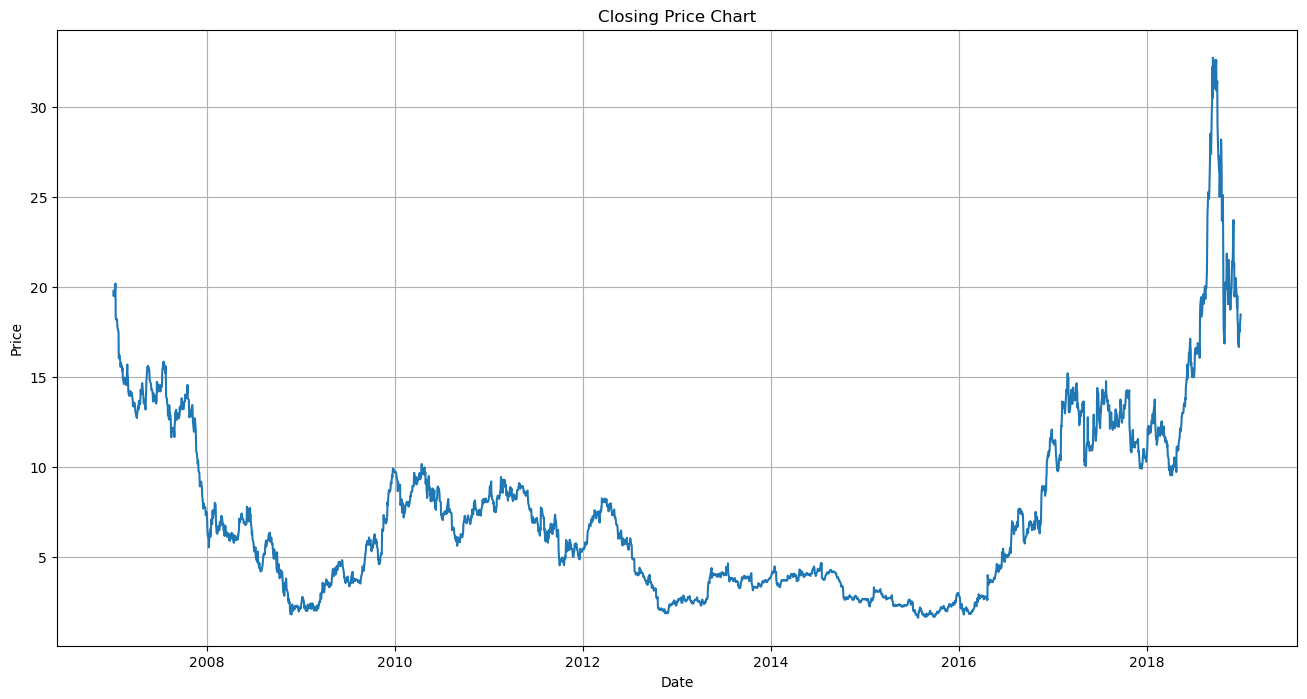

In [4]:
plt.figure(figsize=(16,8))
plt.plot(dataset['Adj Close'])
plt.title('Closing Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [5]:
monthly = dataset.asfreq('BM')
monthly['Returns'] = dataset['Adj Close'].pct_change().dropna()
monthly.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2007-01-31,15.83,15.89,15.52,15.55,15.55,30280100.0,-0.015199
2007-02-28,15.30,15.30,14.96,15.07,15.07,32605500.0,-0.000663
2007-03-30,13.09,13.18,12.97,13.06,13.06,18148200.0,-0.001529
2007-04-30,14.27,14.28,13.81,13.82,13.82,20980200.0,-0.034916
2007-05-31,14.43,14.43,14.24,14.27,14.27,14011200.0,-0.006959


In [6]:
monthly['Month_Name'] = monthly.index.strftime("%b")
monthly['Month_Name_Year'] = monthly.index.strftime("%b-%Y")

In [7]:
import calendar
import datetime

monthly = monthly.reset_index()
monthly['Month'] = monthly["Date"].dt.month

In [8]:
monthly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Month_Name,Month_Name_Year,Month
0,2007-01-31,15.83,15.89,15.52,15.55,15.55,30280100.0,-0.015199,Jan,Jan-2007,1
1,2007-02-28,15.30,15.30,14.96,15.07,15.07,32605500.0,-0.000663,Feb,Feb-2007,2
2,2007-03-30,13.09,13.18,12.97,13.06,13.06,18148200.0,-0.001529,Mar,Mar-2007,3
3,2007-04-30,14.27,14.28,13.81,13.82,13.82,20980200.0,-0.034916,Apr,Apr-2007,4
4,2007-05-31,14.43,14.43,14.24,14.27,14.27,14011200.0,-0.006959,May,May-2007,5


In [9]:
monthly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Month_Name,Month_Name_Year,Month
0,2007-01-31,15.83,15.89,15.52,15.55,15.55,30280100.0,-0.015199,Jan,Jan-2007,1
1,2007-02-28,15.30,15.30,14.96,15.07,15.07,32605500.0,-0.000663,Feb,Feb-2007,2
2,2007-03-30,13.09,13.18,12.97,13.06,13.06,18148200.0,-0.001529,Mar,Mar-2007,3
3,2007-04-30,14.27,14.28,13.81,13.82,13.82,20980200.0,-0.034916,Apr,Apr-2007,4
4,2007-05-31,14.43,14.43,14.24,14.27,14.27,14011200.0,-0.006959,May,May-2007,5


In [10]:
monthly.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Month_Name,Month_Name_Year,Month
139,2018-08-31,24.89,25.24,24.72,25.17,25.17,65206400.0,0.011249,Aug,Aug-2018,8
140,2018-09-28,32.24,32.78,29.98,30.89,30.89,165453500.0,-0.052163,Sep,Sep-2018,9
141,2018-10-31,17.87,18.34,17.12,18.21,18.21,110463700.0,0.058721,Oct,Oct-2018,10
142,2018-11-30,21.30,21.36,20.52,21.30,21.30,82370700.0,-0.006066,Nov,Nov-2018,11
143,2018-12-31,18.15,18.51,17.85,18.46,18.46,84732200.0,0.035915,Dec,Dec-2018,12


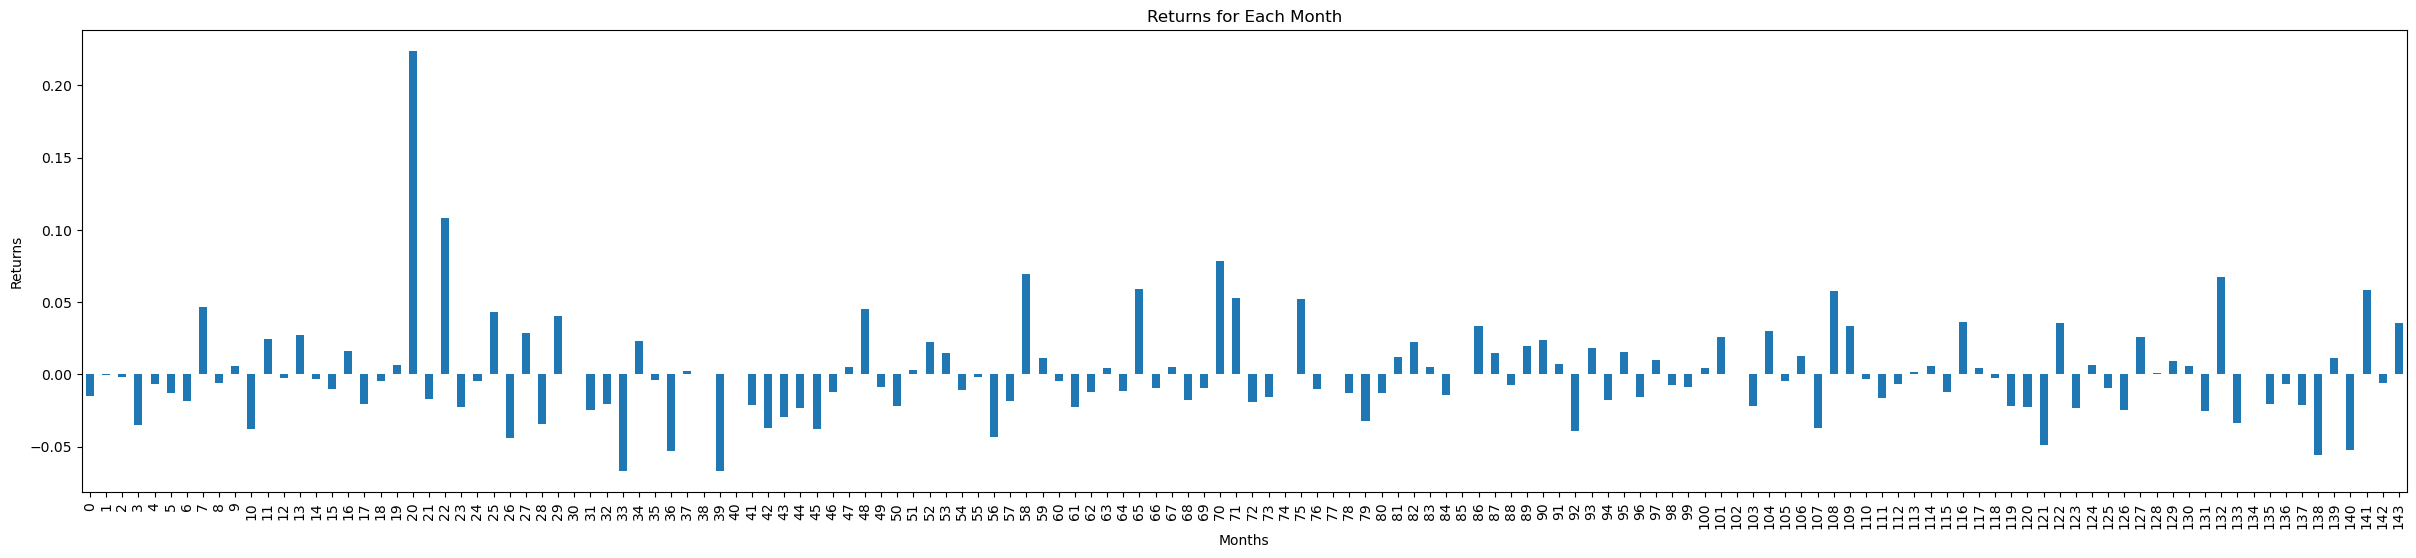

In [29]:
monthly['Returns'].plot(kind='bar', figsize=(30,6))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title("Returns for Each Month")
plt.show()

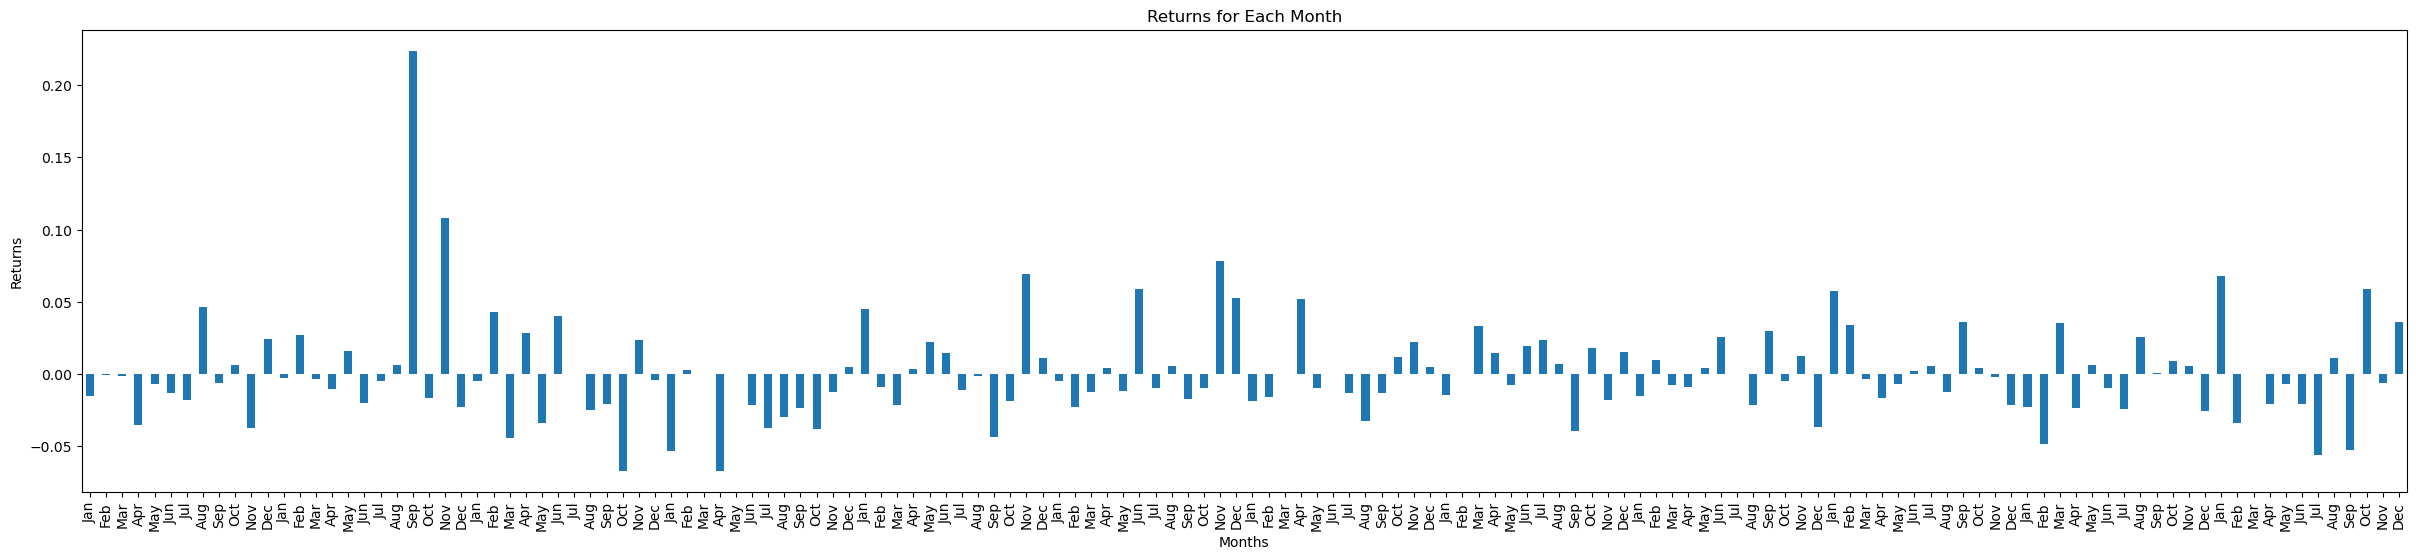

In [12]:
monthly['Returns'].plot(kind='bar', figsize=(30,6))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title("Returns for Each Month")
plt.xticks(monthly.index, monthly['Month_Name'])
plt.show()

In [13]:
from matplotlib import dates as mdates
import datetime as dt

monthly['ReturnsPositive'] = 0 < monthly['Returns']
monthly['Date'] = pd.to_datetime(monthly['Date'])
monthly['Date'] = monthly['Date'].apply(mdates.date2num)

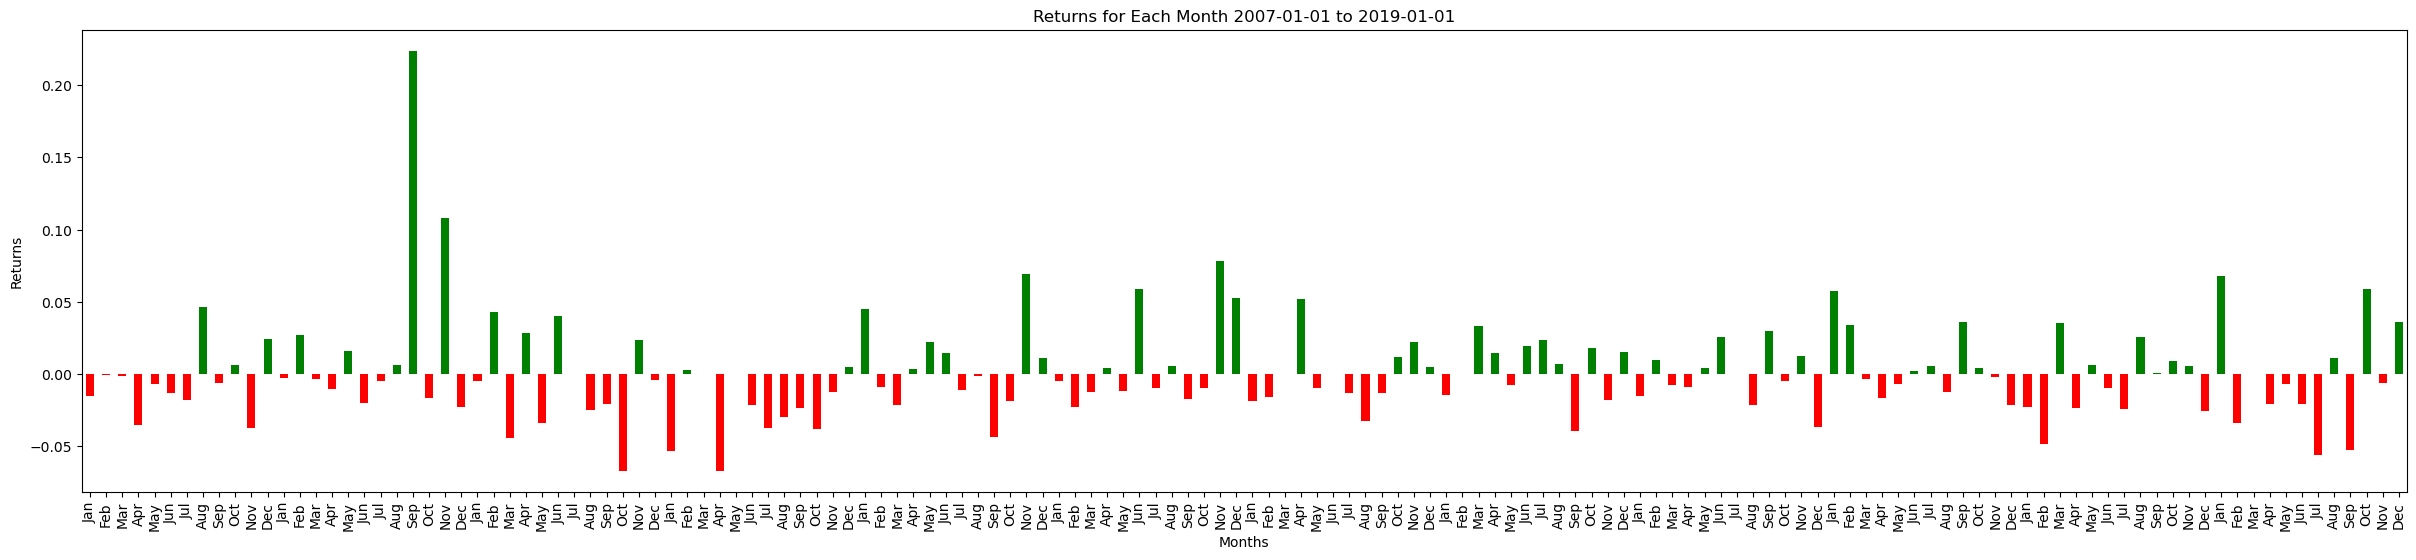

In [14]:
colors = monthly.ReturnsPositive.map({True: 'g', False: 'r'})
monthly['Returns'].plot(kind='bar', color = colors, figsize=(30,6))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title("Returns for Each Month " + start + ' to ' + end)
plt.xticks(monthly.index, monthly['Month_Name'])
plt.show()

In [15]:
yearly = dataset.asfreq('BY')
yearly['Returns'] = dataset['Adj Close'].pct_change().dropna()

In [16]:
yearly

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2007-12-31,7.26,7.60,7.26,7.50,7.50,19668800,0.024590
2008-12-31,2.20,2.20,2.11,2.16,2.16,10226500,-0.022624
2009-12-31,9.75,9.77,9.63,9.68,9.68,9396500,-0.004115
2010-12-31,8.14,8.19,8.05,8.18,8.18,7971200,0.004914
2011-12-30,5.34,5.45,5.28,5.40,5.40,6906000,0.011236
2012-12-31,2.29,2.42,2.28,2.40,2.40,20698200,0.052632
2013-12-31,3.87,3.88,3.83,3.87,3.87,12347800,0.005195
2014-12-31,2.64,2.70,2.64,2.67,2.67,11177900,0.015209
2015-12-31,2.97,3.01,2.87,2.87,2.87,11086100,-0.036913


In [17]:
yearly = yearly.reset_index()

In [18]:
yearly

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2007-12-31,7.26,7.60,7.26,7.50,7.50,19668800,0.024590
1,2008-12-31,2.20,2.20,2.11,2.16,2.16,10226500,-0.022624
2,2009-12-31,9.75,9.77,9.63,9.68,9.68,9396500,-0.004115
3,2010-12-31,8.14,8.19,8.05,8.18,8.18,7971200,0.004914
4,2011-12-30,5.34,5.45,5.28,5.40,5.40,6906000,0.011236
5,2012-12-31,2.29,2.42,2.28,2.40,2.40,20698200,0.052632
6,2013-12-31,3.87,3.88,3.83,3.87,3.87,12347800,0.005195
7,2014-12-31,2.64,2.70,2.64,2.67,2.67,11177900,0.015209
8,2015-12-31,2.97,3.01,2.87,2.87,2.87,11086100,-0.036913
9,2016-12-30,11.70,11.78,11.25,11.34,11.34,44095400,-0.021570


In [19]:
yearly['Years'] = yearly['Date'].dt.year

In [20]:
yearly

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Years
0,2007-12-31,7.26,7.60,7.26,7.50,7.50,19668800,0.024590,2007
1,2008-12-31,2.20,2.20,2.11,2.16,2.16,10226500,-0.022624,2008
2,2009-12-31,9.75,9.77,9.63,9.68,9.68,9396500,-0.004115,2009
3,2010-12-31,8.14,8.19,8.05,8.18,8.18,7971200,0.004914,2010
4,2011-12-30,5.34,5.45,5.28,5.40,5.40,6906000,0.011236,2011
5,2012-12-31,2.29,2.42,2.28,2.40,2.40,20698200,0.052632,2012
6,2013-12-31,3.87,3.88,3.83,3.87,3.87,12347800,0.005195,2013
7,2014-12-31,2.64,2.70,2.64,2.67,2.67,11177900,0.015209,2014
8,2015-12-31,2.97,3.01,2.87,2.87,2.87,11086100,-0.036913,2015
9,2016-12-30,11.70,11.78,11.25,11.34,11.34,44095400,-0.021570,2016


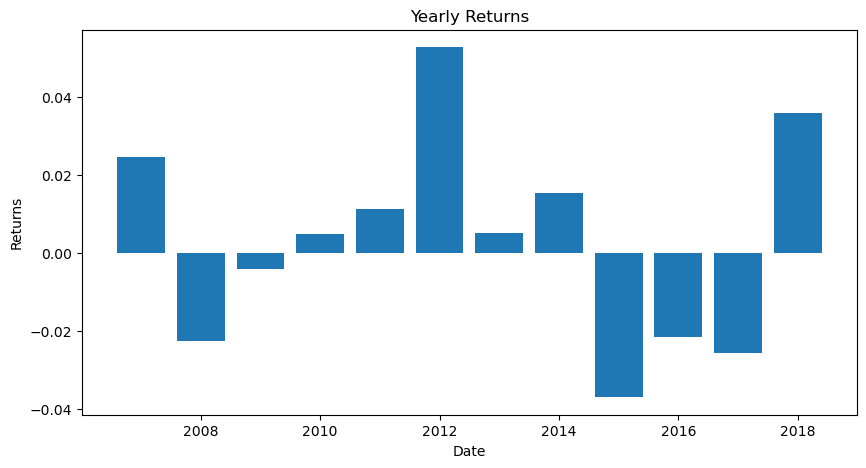

In [21]:
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], align='center')
plt.title('Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

In [22]:
from matplotlib import dates as mdates
import datetime as dt

yearly['ReturnsPositive'] = 0 < yearly['Returns']
yearly['Date'] = pd.to_datetime(yearly['Date'])
yearly['Date'] = yearly['Date'].apply(mdates.date2num)

In [23]:
yearly

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Years,ReturnsPositive
0,13878.0,7.26,7.60,7.26,7.50,7.50,19668800,0.024590,2007,True
1,14244.0,2.20,2.20,2.11,2.16,2.16,10226500,-0.022624,2008,False
2,14609.0,9.75,9.77,9.63,9.68,9.68,9396500,-0.004115,2009,False
3,14974.0,8.14,8.19,8.05,8.18,8.18,7971200,0.004914,2010,True
4,15338.0,5.34,5.45,5.28,5.40,5.40,6906000,0.011236,2011,True
5,15705.0,2.29,2.42,2.28,2.40,2.40,20698200,0.052632,2012,True
6,16070.0,3.87,3.88,3.83,3.87,3.87,12347800,0.005195,2013,True
7,16435.0,2.64,2.70,2.64,2.67,2.67,11177900,0.015209,2014,True
8,16800.0,2.97,3.01,2.87,2.87,2.87,11086100,-0.036913,2015,False
9,17165.0,11.70,11.78,11.25,11.34,11.34,44095400,-0.021570,2016,False


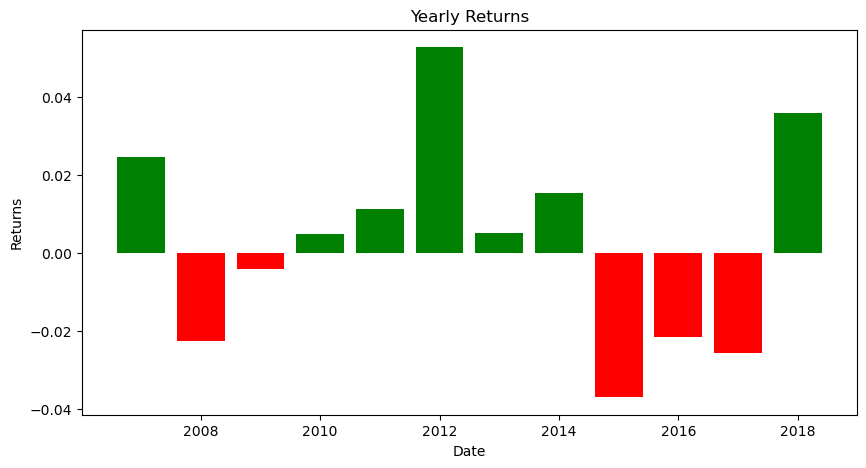

In [24]:
colors = yearly.ReturnsPositive.map({True: 'g', False: 'r'})
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.title('Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

In [25]:
dataset['Returns'] = dataset['Adj Close'].pct_change().dropna()

In [41]:
yearly_returns_avg = dataset.groupby([dataset.index.year]).mean()['Returns']

In [42]:
yearly_returns_avg

Date
2007   -0.003543
2008   -0.003470
2009    0.007087
2010   -0.000265
2011   -0.001038
2012   -0.002664
2013    0.002413
2014   -0.001137
2015    0.000893
2016    0.006752
2017    0.000297
2018    0.003122
Name: Returns, dtype: float64

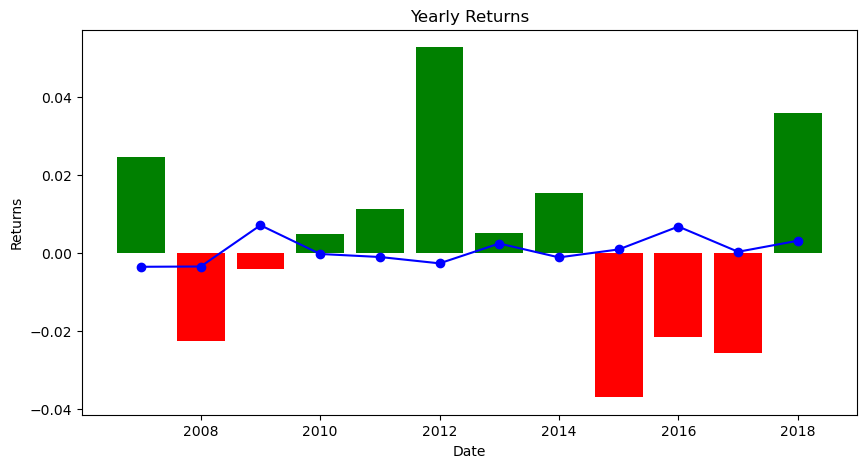

In [28]:
colors = yearly.ReturnsPositive.map({True: 'g', False: 'r'})
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.plot(yearly_returns_avg, marker='o', color='b')
plt.title('Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()